In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/네카라쿠배/머신러닝/주차수요 예측/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/네카라쿠배/머신러닝/주차수요 예측/data/test.csv')
age_gender = pd.read_csv('/content/drive/MyDrive/네카라쿠배/머신러닝/주차수요 예측/data/age_gender_info.csv')

In [3]:
# 데이터 오류 삭제

## 1번 데이터 오류
train = train[train.단지코드 != 'C1490']
train = train[train.단지코드 != 'C2497']
train = train[train.단지코드 != 'C2620']
train = train[train.단지코드 != 'C1344']
train = train[train.단지코드 != 'C1024']
train = train[train.단지코드 != 'C2470']
train = train[train.단지코드 != 'C1206']
train = train[train.단지코드 != 'C1740']
train = train[train.단지코드 != 'C2405']
train = train[train.단지코드 != 'C1804']

## 2번 데이터오류 
train = train[train.단지코드 != 'C2085']
train = train[train.단지코드 != 'C1397']
train = train[train.단지코드 != 'C2431']
train = train[train.단지코드 != 'C1649']
train = train[train.단지코드 != 'C1036']
train = train[train.단지코드 != 'C2675']

test = test[test.단지코드 != 'C2675']

## 3번 데이터 오류
train = train[train.단지코드 != 'C2335']
train = train[train.단지코드 != 'C1327']
train = train[train.단지코드 != 'C1095']
train = train[train.단지코드 != 'C2051']
train = train[train.단지코드 != 'C1218']
train = train[train.단지코드 != 'C1894']
train = train[train.단지코드 != 'C2483']
train = train[train.단지코드 != 'C1502']
train = train[train.단지코드 != 'C1988']

test = test[test.단지코드 != 'C2335']
test = test[test.단지코드 != 'C1327']

In [4]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0


In [5]:
# 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장에 NULL값 존재
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2818 non-null   object 
 1   총세대수                          2818 non-null   int64  
 2   임대건물구분                        2818 non-null   object 
 3   지역                            2818 non-null   object 
 4   공급유형                          2818 non-null   object 
 5   전용면적                          2818 non-null   float64
 6   전용면적별세대수                      2818 non-null   int64  
 7   공가수                           2818 non-null   float64
 8   자격유형                          2818 non-null   object 
 9   임대보증금                         2259 non-null   object 
 10  임대료                           2259 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2611 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2818 non-null   float64
 13  단지내

In [6]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [7]:
# 자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영)에 NULL값 존재
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1008 non-null   object 
 1   총세대수                          1008 non-null   int64  
 2   임대건물구분                        1008 non-null   object 
 3   지역                            1008 non-null   object 
 4   공급유형                          1008 non-null   object 
 5   전용면적                          1008 non-null   float64
 6   전용면적별세대수                      1008 non-null   int64  
 7   공가수                           1008 non-null   float64
 8   자격유형                          1006 non-null   object 
 9   임대보증금                         828 non-null    object 
 10  임대료                           828 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  970 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1008 non-null   float64
 13  단지내

In [8]:
# train과 test의 평균, 표준편차 값은 비슷함
display(train.describe())
display(test.describe())

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2818.000000,2818.000000,2818.000000,2818.000000,2611.000000,2818.000000,2818.000000,2818.000000
mean,891.193400,44.013112,103.135912,12.984741,0.184221,3.704400,591.328247,545.908446
std,521.339747,32.073840,133.882695,10.649586,0.435226,2.692419,392.148022,428.334603
min,26.000000,12.620000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,511.250000,32.100000,14.250000,4.000000,0.000000,2.000000,277.000000,209.000000
50%,781.000000,39.840000,60.000000,11.000000,0.000000,3.000000,496.000000,465.000000
75%,1106.000000,49.700000,143.750000,20.000000,0.000000,4.000000,809.000000,751.000000
max,2568.000000,583.400000,1865.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000


,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
count,1008.000000,1008.000000,1008.000000,1008.000000,970.000000,1008.000000,1008.000000
mean,869.378968,43.788462,101.093254,15.630952,0.138144,4.597222,546.678571
std,535.908018,36.105647,126.674450,11.116013,0.437519,5.391566,341.278739
min,75.000000,9.960000,1.000000,0.000000,0.000000,1.000000,29.000000
25%,492.500000,33.150000,14.000000,6.000000,0.000000,2.000000,286.000000
50%,754.000000,39.720000,60.000000,16.000000,0.000000,3.000000,458.000000
75%,1161.000000,47.410000,140.000000,23.000000,0.000000,5.000000,706.500000
max,2572.000000,583.400000,1341.000000,45.000000,2.000000,50.000000,1696.000000


In [9]:
import numpy as np

train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
train.loc[train.임대료=='-', '임대료'] = np.nan

test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan

In [10]:
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

In [11]:
test['도보 10분거리 내 버스정류장 수'].unique()

array([ 2.,  3., 16.,  6.,  1.,  4.,  5.,  8., 10., 13.,  7., 11., 50.,
       12., 14., 18., 15., 19.])

In [12]:
# 도보 10분거리 내 버스정류장 수가 50일수는 없다고 판단하여 mean값으로 대체
test['도보 10분거리 내 버스정류장 수'].unique()
test.loc[test['도보 10분거리 내 버스정류장 수'] == 50, '도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].mean()

In [13]:
# train, test 데이터의 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 지하철역 수(환승노선 수 반영) nan 값을 0으로 채움
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(0)

test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

In [14]:
# 임대료 처리 
train.loc[train['공급유형'] == '공공분양', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '장기전세', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '국민임대', '임대료'] = train['임대료'].fillna(0)
train.loc[train['공급유형'] == '행복주택', '임대료'] = train['임대료'].fillna(0)

test.loc[test['공급유형'] == '영구임대', '임대료'] = test['임대료'].fillna(0)
test.loc[test['공급유형'] == '행복주택', '임대료'] = test['임대료'].fillna(0)

# 임대보증금 처리
train.loc[train['공급유형'] == '공공분양', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '장기전세', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '국민임대', '임대보증금'] = train['임대보증금'].fillna(0)
train.loc[train['공급유형'] == '행복주택', '임대보증금'] = train['임대보증금'].fillna(0)

test.loc[test['공급유형'] == '영구임대', '임대보증금'] = test['임대보증금'].fillna(0)
test.loc[test['공급유형'] == '행복주택', '임대보증금'] = test['임대보증금'].fillna(0)

In [15]:
# 임대상가의 임대료와 임대보증금은 해당 지역의 평균값으로 대체

## 임대 상가의 임대료 처리 
train.loc[train['지역'] == '부산광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[train['지역'] == '대전광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
train.loc[train['지역'] == '경상남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
train.loc[train['지역'] == '충청남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
train.loc[train['지역'] == '강원도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '제주특별자치도']['임대료'].mean())

test.loc[test['지역'] == '부산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
test.loc[test['지역'] == '대전광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
test.loc[test['지역'] == '울산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '울산광역시']['임대료'].mean())
test.loc[test['지역'] == '충청남도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
test.loc[test['지역'] == '강원도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())  

## 임대 상가의 임대보증금 처리 
train.loc[train['지역'] == '부산광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[train['지역'] == '대전광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
train.loc[train['지역'] == '경상남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
train.loc[train['지역'] == '충청남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
train.loc[train['지역'] == '강원도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '제주특별자치도']['임대보증금'].mean())

test.loc[test['지역'] == '부산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '대전광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
test.loc[test['지역'] == '울산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '울산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '충청남도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
test.loc[test['지역'] == '강원도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())

In [16]:
# 자격 유형 nan 처리
test[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [17]:
# 같은 단지의 자격유형이 모두 A이기때문에 A로 채움
test[test['단지코드']=='C2411']
test.loc[test['단지코드'].isin(['C2411']) & test['자격유형'].isnull(), '자격유형'] = 'A'

In [18]:
# 같은 단지의 영구임대 유형이 모두 C이므로 C로 채움
test.loc[test['단지코드'].isin(['C2253']) & test['자격유형'].isnull(), '자격유형'] = 'C'

In [19]:
# train, test에만 있는 지역값 추리기
print("train 데이터의 지역 : ", sorted(train['지역'].unique()))
print("test 데이터의 지역 : ", sorted(test['지역'].unique()))

print("train - test : ", set(train['지역']).difference(set(test['지역'])))
print("test - train : ", set(test['지역']).difference(set(train['지역'])))

train 데이터의 지역 :  ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
test 데이터의 지역 :  ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
train - test :  {'서울특별시'}
test - train :  set()


In [20]:
train = train[train.지역 != '서울특별시']

In [21]:
# 서로 관련이 있는 공급유형과 자격유형을 합쳐서 새로운 컬럼 만듦
train['공급_자격'] = train.apply(lambda r : r['공급유형'] + '_' +r['자격유형'], axis=1)
test['공급_자격'] = test.apply(lambda r : r['공급유형'] + '_' +r['자격유형'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# train, test에만 있는 공급_자격값 추리기
print("train 데이터의 공급_자격 : ", sorted(train['공급_자격'].unique()))
print("test 데이터의 공급_자격 : ", sorted(test['공급_자격'].unique()))

print("train - test : ", set(train['공급_자격']).difference(set(test['공급_자격'])))
print("test - train : ", set(test['공급_자격']).difference(set(train['공급_자격'])))

train 데이터의 공급_자격 :  ['공공분양_D', '공공임대(10년)_A', '공공임대(50년)_A', '공공임대(분납)_A', '국민임대_A', '국민임대_B', '국민임대_E', '국민임대_G', '국민임대_H', '영구임대_A', '영구임대_C', '영구임대_E', '영구임대_F', '영구임대_I', '임대상가_D', '행복주택_J', '행복주택_K', '행복주택_L', '행복주택_M', '행복주택_N', '행복주택_O']
test 데이터의 공급_자격 :  ['공공임대(10년)_A', '공공임대(50년)_A', '공공임대(분납)_A', '국민임대_A', '국민임대_E', '국민임대_G', '국민임대_H', '영구임대_C', '영구임대_D', '영구임대_I', '임대상가_D', '행복주택_J', '행복주택_K', '행복주택_L', '행복주택_M', '행복주택_N']
train - test :  {'행복주택_O', '영구임대_E', '공공분양_D', '영구임대_F', '국민임대_B', '영구임대_A'}
test - train :  {'영구임대_D'}


In [23]:
train = train[train['공급_자격'] != '공공분양_D']
train = train[train['공급_자격'] != '공공임대(5년)_A']
train = train[train['공급_자격'] != '국민임대_B']
train = train[train['공급_자격'] != '영구임대_A']
train = train[train['공급_자격'] != '영구임대_E']
train = train[train['공급_자격'] != '영구임대_F']
train = train[train['공급_자격'] != '장기전세_A']
train = train[train['공급_자격'] != '행복주택_O']

test = test[test['공급_자격'] != '영구임대_D']

In [24]:
train['실거주율'] = (train['총세대수'] - train['공가수'])/train['총세대수']
test['실거주율'] = (test['총세대수'] - test['공가수'])/test['총세대수']

transport = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
train['대중교통현황'] = train[transport].sum(axis=1)
test['대중교통현황'] = test[transport].sum(axis=1)

train['단지내주차면수대비총세대수비율'] = train['총세대수'] / train['단지내주차면수']
test['단지내주차면수대비총세대수비율'] = test['총세대수'] / test['단지내주차면수']

train['단지내주차면수대비등록차량비율'] = train['등록차량수'] / train['단지내주차면수']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [25]:
minors = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)']
age_gender['미성년자'] = age_gender[minors].sum(axis=1)

In [26]:
train = pd.merge(train, age_gender, on = '지역', how = 'left')
test = pd.merge(test, age_gender, on = '지역', how = 'left')
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,공급_자격,실거주율,대중교통현황,단지내주차면수대비총세대수비율,단지내주차면수대비등록차량비율,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),미성년자
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.163127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0,국민임대_A,0.970711,1.0,1.439759,0.879518,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2743,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.970711,1.0,1.439759,0.879518,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2744,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.970711,1.0,1.439759,0.879518,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568
2745,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.970711,1.0,1.439759,0.879518,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.163568


In [27]:
# 중복 조회 결과 중복 존재해서 중복 제거
train.shape, train.drop_duplicates().shape 
train = train.drop_duplicates()

In [28]:
# 중복 조회 결과 중복 존재 중복 제거
test.shape, test.drop_duplicates().shape
test = test.drop_duplicates()

In [29]:
age_columns = ['10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)','30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)','60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)','90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)']

train_agg = train.drop(age_columns, axis=1)
test_agg = test.drop(age_columns, axis=1)

In [30]:
train_agg

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,공급_자격,실거주율,대중교통현황,단지내주차면수대비총세대수비율,단지내주차면수대비등록차량비율,미성년자
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.163127
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.163127
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.163127
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.163127
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,국민임대_A,0.968807,3.0,0.873397,0.328526,0.163127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0,국민임대_A,0.970711,1.0,1.439759,0.879518,0.163568
2743,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.970711,1.0,1.439759,0.879518,0.163568
2744,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.970711,1.0,1.439759,0.879518,0.163568
2745,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0,국민임대_A,0.970711,1.0,1.439759,0.879518,0.163568


In [31]:
# 등록차량수와의 상관관계 파악
train_agg.corr()['등록차량수'].sort_values()

단지내주차면수대비총세대수비율                -0.429797
도보 10분거리 내 지하철역 수(환승노선 수 반영)   -0.053019
전용면적                            0.049640
미성년자                            0.098085
대중교통현황                          0.105384
도보 10분거리 내 버스정류장 수              0.116040
공가수                             0.120390
전용면적별세대수                        0.215384
실거주율                            0.251112
임대보증금                           0.305453
임대료                             0.407654
단지내주차면수대비등록차량비율                 0.419626
총세대수                            0.447872
단지내주차면수                         0.848681
등록차량수                           1.000000
Name: 등록차량수, dtype: float64

In [33]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

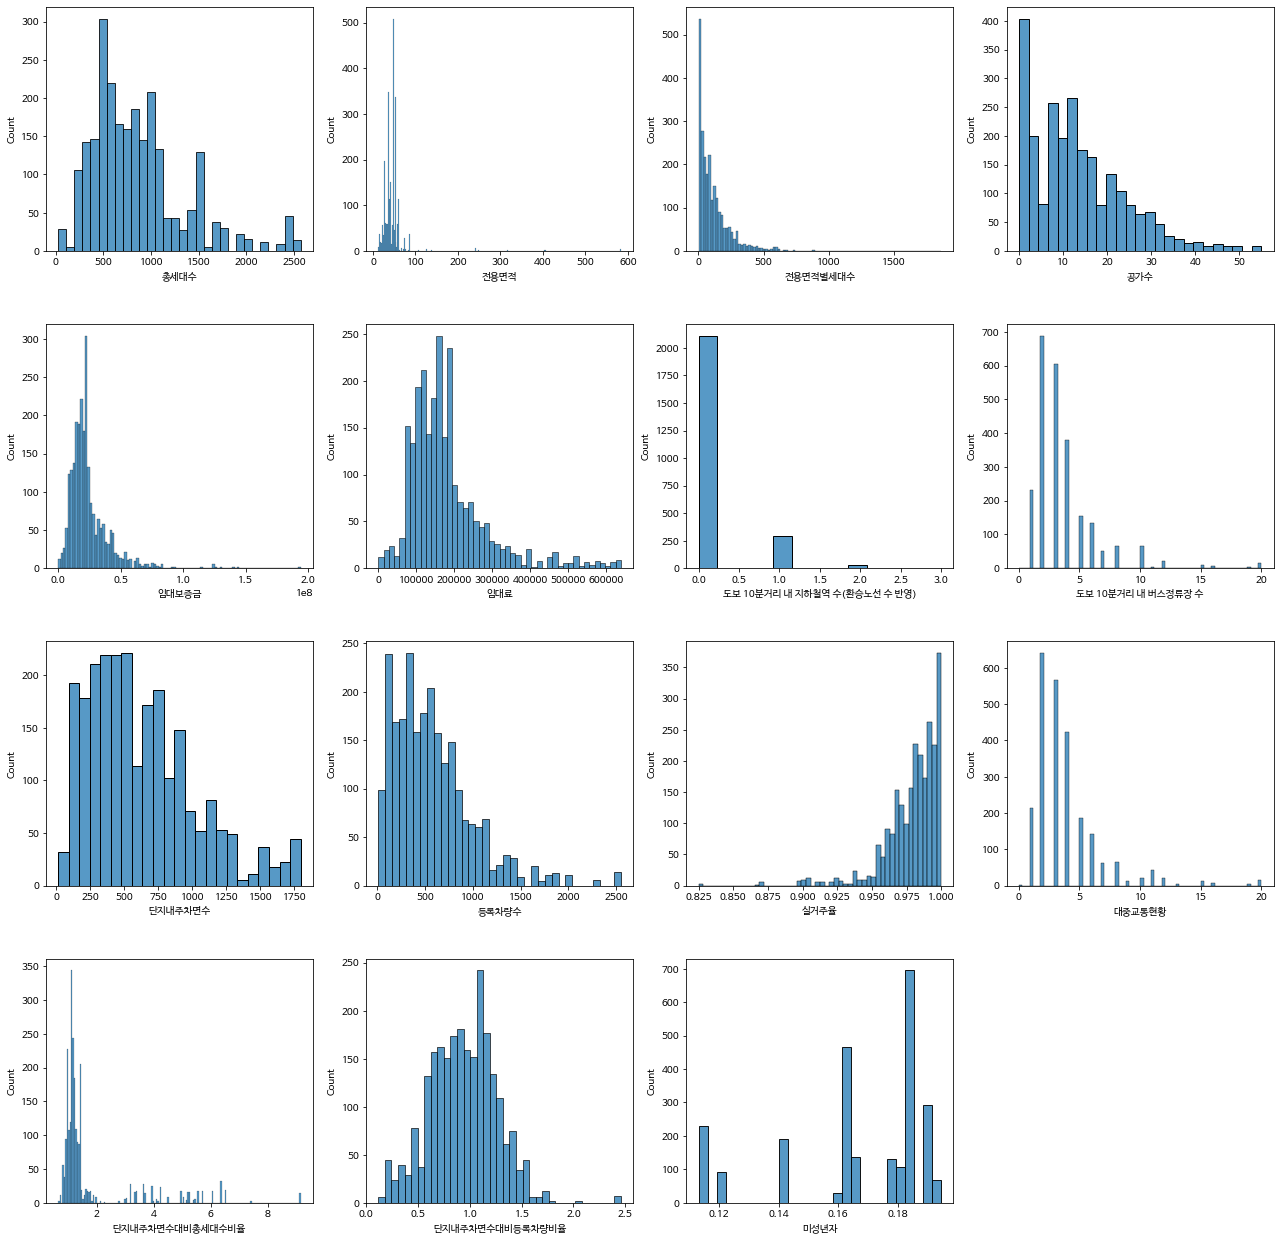

In [34]:
# 변수별 분포 확인

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

plt.rc('font', family='NanumBarunGothic') 

numeric_cols = []
for col in train_agg.columns:
    if train_agg[col].dtypes != 'object':
        numeric_cols.append(col)

fig = plt.figure(figsize=(22, 22))
for i, n in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train_agg[n])

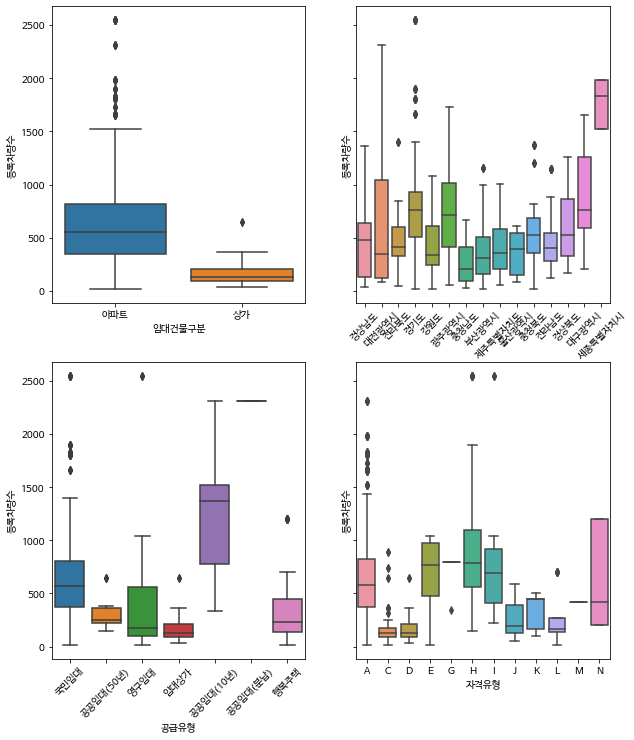

In [35]:
# 변수들의 등록차량수 변수에 대한 boxplot
fig, axes = plt.subplots(2,2, figsize=(10,12), sharey=True)

sns.boxplot(ax=axes[0,0], x='임대건물구분', y='등록차량수', data=train_agg);
sns.boxplot(ax=axes[0,1], x='지역', y='등록차량수', data=train_agg);
sns.boxplot(ax=axes[1,0], x='공급유형', y='등록차량수', data=train_agg);
sns.boxplot(ax=axes[1,1], x='자격유형', y='등록차량수', data=train_agg);

axes[0,1].tick_params(axis='x', labelrotation=45);
axes[1,0].tick_params(axis='x', labelrotation=45);

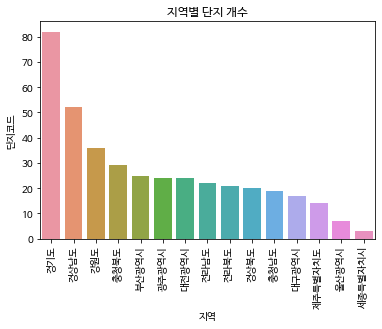

In [36]:
sns.barplot(data=train_agg.groupby(['지역']).nunique().sort_values(by=['단지코드'], ascending=False),
            x=train_agg.groupby(['지역']).nunique().sort_values(by=['단지코드'], ascending=False).index, y='단지코드')
plt.xticks(rotation=90)
plt.title('지역별 단지 개수')
plt.show()

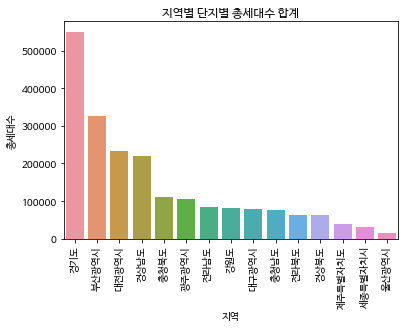

In [37]:
sns.barplot(data=train_agg.groupby(['지역']).sum().sort_values(by=['총세대수'], ascending=False),
            x=train_agg.groupby(['지역']).sum().sort_values(by=['총세대수'], ascending=False).index, y='총세대수')
plt.xticks(rotation=90)
plt.title('지역별 단지별 총세대수 합계')
plt.show()

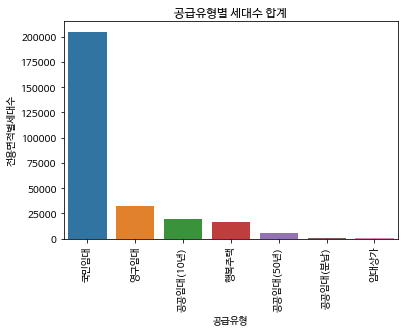

In [38]:
sns.barplot(data=train_agg.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=train_agg.groupby(['공급유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.xticks(rotation=90)
plt.title('공급유형별 세대수 합계')
plt.show()

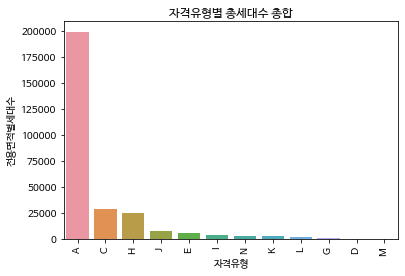

In [39]:
sns.barplot(data=train_agg.groupby(['자격유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False),
            x=train_agg.groupby(['자격유형']).sum().sort_values(by=['전용면적별세대수'], ascending=False).index, y='전용면적별세대수')
plt.title('자격유형별 총세대수 총합')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, '지역별 도보 10분거리 내 지하철역 수의 평균')

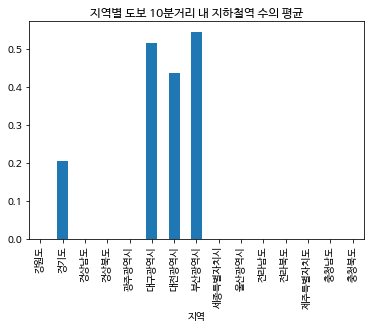

In [40]:
train_agg.groupby(['지역'])['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].mean().plot(kind='bar')
plt.title('지역별 도보 10분거리 내 지하철역 수의 평균')

Text(0.5, 1.0, '지역별 도보 10분거리 내 버스정류장 수의 평균')

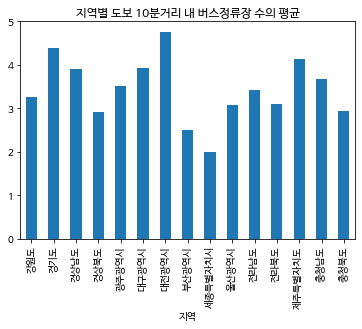

In [41]:
train_agg.groupby(['지역'])['도보 10분거리 내 버스정류장 수'].mean().plot(kind='bar')
plt.title('지역별 도보 10분거리 내 버스정류장 수의 평균')

In [42]:
# 총세대수는 단지내주차면수에 비해 많다, 반면에 등록차량수는 단지내주차면수를 충족 못함
fig = go.Figure()
fig.add_trace(go.Histogram(x=train_agg['단지내주차면수대비등록차량비율'], name='주차면수대비등록차량비율'))
fig.add_trace(go.Histogram(x=train_agg['단지내주차면수대비총세대수비율'], name='주차면수대비총세대수비율', xbins={'size':0.1}))

fig.update_layout(barmode='overlay',bargap=0.0)
fig.update_traces(opacity=0.75)
fig.show()

In [43]:
# 미세하지만 회귀선에 따르면 거주율이 높을수록 주차면수대비등록차량비율도 높음
fig = px.scatter(
    train_agg, x='실거주율', y='단지내주차면수대비등록차량비율', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue',
    marginal_x='histogram', marginal_y='histogram'
)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [44]:
# 총세대수가 증가함에따라 등록차량수도 증가함
fig = px.scatter(
    train_agg, x='총세대수', y='등록차량수', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue', marginal_x='histogram', marginal_y='histogram'
)
fig.show()

In [45]:
# 의문 - 공가수가 증가하는데 등록차량수가 증가한다?
fig = px.scatter(
    train_agg, x='공가수', y='등록차량수', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue',
    marginal_x='histogram', marginal_y='histogram'
)
fig.show()

In [46]:
train_agg.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수', '공급_자격', '실거주율', '대중교통현황',
       '단지내주차면수대비총세대수비율', '단지내주차면수대비등록차량비율', '미성년자'],
      dtype='object')

In [47]:
# 의문 - 대중교통현황 증가, 등록차량수 증가
fig = px.scatter(
    train_agg, x='대중교통현황', y='등록차량수', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue',
    marginal_x='histogram', marginal_y='histogram'
)
fig.show()